# FORESEE Models: Heavy Neutral Leptons (HNLs)

## Load Libraries 

In [1]:
import numpy as np
import sys
import os
src_path = "../../../"
sys.path.append(src_path)
src_path = "../"
sys.path.append(src_path)

from src.foresee import Foresee, Utility, Model
from matplotlib import pyplot as plt

from HeavyNeutralLepton import * 

## 1. Specifying the Model

Heavy Neutral Leptons, denoted by $N$, are fermionic gauge singlets that can be added as an extenstion to the standard model. These HNLs mix with the SM active neutrinos, and thus pick up couplings to the SM which are suppresed by a small mixing angle, $U_\alpha$ for $\alpha = e, \mu, \tau$. The phenomenology of these interactions can be described by the following Lagrangian: 
\begin{equation} 
\mathcal{L} \supset -{m_N} \bar{N}^c N  - \frac{1}{\sqrt{2}}g\sum_{\alpha=e,\mu,\tau} {U^*_\alpha}  W_\mu^+  \,\overline{N^c} \, \gamma^\mu l_\alpha  - \frac{1}{2\cos\theta_W}g\sum_{\alpha=e,\mu,\tau} {U^*_\alpha} Z_\mu  \overline{N^c}\, \gamma^\mu \nu_\alpha+ \text{h.c.} . 
\end{equation}

In principle, this model has four free parameters: the mass $m_N$ and the three mixing angles $U_\alpha$. In practice, however, we will therefore impose some relations between the mixing angles to reduce the number of free parameters. In particular, we define $U_\alpha = g \times V_\alpha$ with $V_\alpha= \hat{U}_\alpha$ being the normalized coupling vector, so $|V_\alpha|=1$. Using this definition, we have the HNL mass $m_N$ and the coupling parameter $g$ as free parameters. 

In [2]:
energy = "13.6"
modelname="HNL-mu"
model = Model(modelname, path="./")

**Model Initialization:** The production and decay rates of the HNL depend not only on the choice of $m_N$ and $g$, but also $V_\alpha$. In addition, the number of production modes in sgificantly larger than in other models. To simplify the process of setting up the model we provide the class `HeavyNeutralLepton(ve, vmu, vtau)`. Here `ve`, `vmu` and `vtau` correspond to the three entries of $V_\alpha$. In the following case, we choose $V_e=1$ and $V_\mu=V_\tau=0$. We also define the generators for light/heavy hadrons. 

In [3]:
hnl = HeavyNeutralLepton(ve=0, vmu=1, vtau=0)
hnl.set_generators(
    generators_light = ['EPOSLHC', 'SIBYLL', 'QGSJET'],
    generators_heavy = ['NLO-P8','NLO-P8-Max', 'NLO-P8-Min']
)

**Production:** The leptonic two body decay of a pseudoscalar meson $P \to l N$ is a dominant production mechanism for HNL's. In addition, HNLs with non-vanishing coupling to taus can be produced in two body tau decays $\tau \to M N$ with $M = \pi, K, \rho, K^*$. We can load all the non-vanishing channels using `hnl.get_channels_2body()`. 

Additionally, HNLs can be produced through three body pseudoscalar meson decay $P \to P'lN, VlN$ or through three body tau decays $\tau \to l \nu N$. The non-vanishing three body channels can likewise be loaded using `hnl.get_channels_3body()`. 

In [4]:
production_channels = []
for label, pid0, pid1, br, generator, description in hnl.get_channels_2body():
    print ('include:', description)
    model.add_production_2bodydecay(
        label = label,
        pid0 = pid0,
        pid1 = pid1,
        br = br,
        generator = generator,
        energy = energy,
        nsample = 10,
    )
    production_channels.append([label, None, description])

for label, pid0, pid1, pid2,br,generator,integration,description in hnl.get_channels_3body():
    print ('include:', description)
    model.add_production_3bodydecay(
        label = label,
        pid0 = pid0,
        pid1 = pid1,
        pid2 = pid2,
        br = br,
        generator = generator,
        energy = energy,
        nsample = 10,
        integration = integration,
    )
    production_channels.append([label, None, description])

include: $D^+ \to \mu^+ + N$
include: $D^- \to \mu^- + N$
include: $D_s^+ \to \mu^+ + N$
include: $D_s^- \to \mu^- + N$
include: $B^+ \to + \mu^+ + N$
include: $B^- \to + \mu^- + N$
include: $B_c^+ \to + \mu^+ + N$
include: $B_c^- \to + \mu^- + N$
include: $\pi^+ \to + \mu^+ + N$
include: $\pi^- \to + \mu^- + N$
include: $K^+ \to + \mu^+ + N$
include: $K^- \to + \mu^- + N$
include: $D^0 \to K^- + \mu^+ + N$
include: $D^0 \to K^+ + \mu^- + N$
include: $D^+ \to \bar{K}^0 + \mu^+ + N$
include: $D^- \to K^0 + \mu^- + N$
include: $B^+ \to \bar{D}^0 + \mu^+ + N$
include: $B^- \to D^0 + \mu^- + N$
include: $B^0 \to D^- + \mu^+ + N$
include: $B^0 \to D^+ + \mu^- + N$
include: $B^0_s \to D^-_s + \mu^+ + N$
include: $B^0_s \to D^+_s + \mu^- + N$
include: $B^+_c \to B^0 + \mu^+ + N$
include: $B^-_c \to \bar{B}^0 + \mu^- + N$
include: $B^+_c \to B^0_s + \mu^+ + N$
include: $B^-_c \to \bar{B}^0_s + \mu^- + N$
include: $K^0_S \to \pi^+ + \mu^- + N$
include: $K^0_S \to \pi^- + \mu^+ + N$
include: $K^

**Decay:** HNLs can decay into purely leptonic finalstates, $\nu\, l_\alpha^+ l_\beta^-$ or $\nu\nu\nu$, and Hadronic finalstates, $\nu H^0 (q\overline{q})$ or $l^\pm H^\mp (q\overline{q}')$,   with a decay width proportional to $g^2$. Since we are considering Majorana HNLs, LNV decays are included. We implemented the decay formulas given in [1905.00284](https://arxiv.org/abs/1905.00284). The function `hnl.get_br_and_ctau()` is used to generate the decay branching fractions and lifetimes and stores them in the `model/br` and `model/ctau` folders respectively. The function `hnl.set_brs()` provides the input needed to load the branching fractions into FORESEE. 

In [5]:
hnl.get_br_and_ctau()

In [6]:
model.set_ctau_1d(
    filename=f"model/ctau/ctau.txt",
    coupling_ref=1 
)

modes,finalstates,filenames = hnl.set_brs()

model.set_br_1d(
    modes=modes,
    finalstates=finalstates,
    filenames=filenames
)

We can now initiate FORESEE with the model that we just created. 

In [7]:
foresee = Foresee(path="../../../")
foresee.set_model(model=model)

We can see what the branching fractions look like for each of the production channels. Here we only plot the first 20 channels in 'production_channels'. 

<module 'matplotlib.pyplot' from '/Users/felixkling/anaconda/envs/python3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

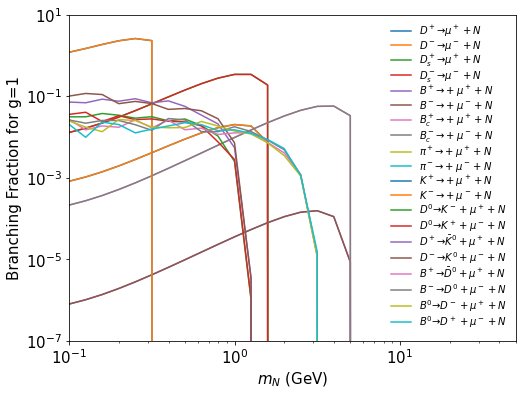

In [8]:
foresee.plot_production_branchings(
    masses = np.logspace(-1,1,21), 
    productions = production_channels[:20],
    xlims=[.1,50],ylims=[1e-7,10],
    xlabel=r"$m_N$ (GeV)", 
    ylabel=r"Branching Fraction for g=1",
    nsample=10,
    fs_label=10,
     figsize=(8,6)
)

## 2. Event Generation

In the following, we want to study one specific benchmark point with $m_{N}=1$ GeV and $\epsilon=1\cdot 10^{-3}$ and export events as a HEPMC file. 

In [9]:
mass, coupling, = 1.0, 1e-3

First, we will produce the corresponding flux for this mass and a reference coupling $\epsilon_{ref}=1$. 

save data to file: ./model/LLP_spectra/13.6TeV_2body_411_-13_NLO-P8_m_1.0.npy
save data to file: ./model/LLP_spectra/13.6TeV_2body_411_-13_NLO-P8-Max_m_1.0.npy
save data to file: ./model/LLP_spectra/13.6TeV_2body_411_-13_NLO-P8-Min_m_1.0.npy
save data to file: ./model/LLP_spectra/13.6TeV_2body_-411_13_NLO-P8_m_1.0.npy
save data to file: ./model/LLP_spectra/13.6TeV_2body_-411_13_NLO-P8-Max_m_1.0.npy
save data to file: ./model/LLP_spectra/13.6TeV_2body_-411_13_NLO-P8-Min_m_1.0.npy
save data to file: ./model/LLP_spectra/13.6TeV_2body_431_-13_NLO-P8_m_1.0.npy
save data to file: ./model/LLP_spectra/13.6TeV_2body_431_-13_NLO-P8-Max_m_1.0.npy
save data to file: ./model/LLP_spectra/13.6TeV_2body_431_-13_NLO-P8-Min_m_1.0.npy
save data to file: ./model/LLP_spectra/13.6TeV_2body_-431_13_NLO-P8_m_1.0.npy
save data to file: ./model/LLP_spectra/13.6TeV_2body_-431_13_NLO-P8-Max_m_1.0.npy
save data to file: ./model/LLP_spectra/13.6TeV_2body_-431_13_NLO-P8-Min_m_1.0.npy
save data to file: ./model/LLP_s

save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_-431_-311_13_NLO-P8_m_1.0.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_-431_-311_13_NLO-P8-Max_m_1.0.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_-431_-311_13_NLO-P8-Min_m_1.0.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_511_-211_-13_NLO-P8_m_1.0.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_511_-211_-13_NLO-P8-Max_m_1.0.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_511_-211_-13_NLO-P8-Min_m_1.0.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_-511_211_13_NLO-P8_m_1.0.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_-511_211_13_NLO-P8-Max_m_1.0.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_-511_211_13_NLO-P8-Min_m_1.0.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_531_-321_-13_NLO-P8_m_1.0.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_531_-321_-13_NLO-P8

save data to file: ./model/LLP_spectra/13.6TeV_3body_tau_-15_-13_-16_NLO-P8_m_1.0.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_tau_-15_-13_-16_NLO-P8-Max_m_1.0.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_tau_-15_-13_-16_NLO-P8-Min_m_1.0.npy


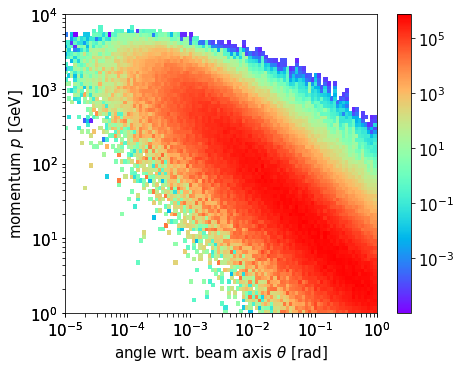

In [10]:
plot=foresee.get_llp_spectrum(mass=mass, coupling=1.0, do_plot=True, save_file=True)
plot.show()

Next, let us define the configuration of the detector (in terms of position, size and luminosity). Here we choose FASER during LHC Run 3. 

In [11]:
foresee.set_detector(
    distance=480, 
    selection="np.sqrt(x.x**2 + x.y**2)<.1", 
    length=1.5, 
    luminosity=250,
)

For our benchmark point, let us now look at how many particle decay inside the decay volume. We also export 1000 unweighted events as a HEPMC file. 

In [12]:
setupnames = ['POWHEG-central', 'POWHEG-max', 'POWHEG-min']

momenta, weights, _ = foresee.write_events(
    mass = mass, 
    coupling = coupling, 
    energy = energy, 
    numberevent = 1000,
    filename = "model/events/test.hepmc", 
    return_data = True,
    nsample=10,
)

for isetup, setup in enumerate(setupnames):
    print("Expected number of events for "+setup+":", round(sum(weights[:,isetup]),3))

Expected number of events for POWHEG-central: 0.805
Expected number of events for POWHEG-max: 1.63
Expected number of events for POWHEG-min: 0.447


Let us plot the resulting energy distribution

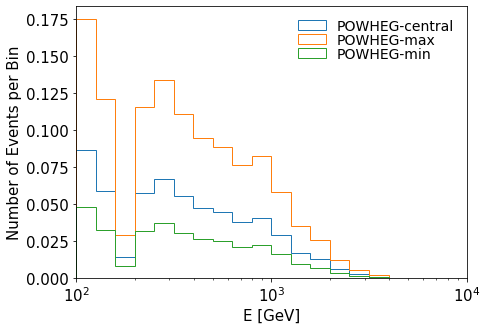

In [13]:
fig = plt.figure(figsize=(7,5))
ax = plt.subplot(1,1,1)
energies = [p.e for p in momenta], 
for isetup, setup in enumerate(setupnames):
    ax.hist(energies, weights=weights[:,isetup], bins=np.logspace(2,4, 20+1), histtype='step', label=setup) 
ax.set_xscale("log")
ax.set_xlim(1e2,1e4) 
ax.set_xlabel("E [GeV]") 
ax.set_ylabel("Number of Events per Bin") 
ax.legend(frameon=False, labelspacing=0, fontsize=14, loc='upper right')
plt.show()

## 3. Sensitivity Reach

In the following, we will obtain the projected sensitivity for the LLP model. For this, we first define a grid of couplings and masses, and then produce the corresponding fluxes. 

In [14]:
masses = np.logspace(-1,1,10+1)
for mass in masses: foresee.get_llp_spectrum(mass=mass,coupling=1)

save data to file: ./model/LLP_spectra/13.6TeV_2body_411_-13_NLO-P8_m_0.1.npy
save data to file: ./model/LLP_spectra/13.6TeV_2body_411_-13_NLO-P8-Max_m_0.1.npy
save data to file: ./model/LLP_spectra/13.6TeV_2body_411_-13_NLO-P8-Min_m_0.1.npy
save data to file: ./model/LLP_spectra/13.6TeV_2body_-411_13_NLO-P8_m_0.1.npy
save data to file: ./model/LLP_spectra/13.6TeV_2body_-411_13_NLO-P8-Max_m_0.1.npy
save data to file: ./model/LLP_spectra/13.6TeV_2body_-411_13_NLO-P8-Min_m_0.1.npy
save data to file: ./model/LLP_spectra/13.6TeV_2body_431_-13_NLO-P8_m_0.1.npy
save data to file: ./model/LLP_spectra/13.6TeV_2body_431_-13_NLO-P8-Max_m_0.1.npy
save data to file: ./model/LLP_spectra/13.6TeV_2body_431_-13_NLO-P8-Min_m_0.1.npy
save data to file: ./model/LLP_spectra/13.6TeV_2body_-431_13_NLO-P8_m_0.1.npy
save data to file: ./model/LLP_spectra/13.6TeV_2body_-431_13_NLO-P8-Max_m_0.1.npy
save data to file: ./model/LLP_spectra/13.6TeV_2body_-431_13_NLO-P8-Min_m_0.1.npy
save data to file: ./model/LLP_s

save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_431_331_-13_NLO-P8_m_0.1.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_431_331_-13_NLO-P8-Max_m_0.1.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_431_331_-13_NLO-P8-Min_m_0.1.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_-431_331_13_NLO-P8_m_0.1.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_-431_331_13_NLO-P8-Max_m_0.1.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_-431_331_13_NLO-P8-Min_m_0.1.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_521_111_-13_NLO-P8_m_0.1.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_521_111_-13_NLO-P8-Max_m_0.1.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_521_111_-13_NLO-P8-Min_m_0.1.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_-521_111_13_NLO-P8_m_0.1.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_-521_111_13_NLO-P8-Max_m_0

save data to file: ./model/LLP_spectra/13.6TeV_3body_vector_511_-413_-13_NLO-P8_m_0.1.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_vector_511_-413_-13_NLO-P8-Max_m_0.1.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_vector_511_-413_-13_NLO-P8-Min_m_0.1.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_vector_-511_413_13_NLO-P8_m_0.1.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_vector_-511_413_13_NLO-P8-Max_m_0.1.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_vector_-511_413_13_NLO-P8-Min_m_0.1.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_vector_531_-433_-13_NLO-P8_m_0.1.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_vector_531_-433_-13_NLO-P8-Max_m_0.1.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_vector_531_-433_-13_NLO-P8-Min_m_0.1.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_vector_-531_433_13_NLO-P8_m_0.1.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_vector_-531_433_13_NLO-P8-M

save data to file: ./model/LLP_spectra/13.6TeV_3body_vector_-521_223_13_NLO-P8_m_0.1.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_vector_-521_223_13_NLO-P8-Max_m_0.1.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_vector_-521_223_13_NLO-P8-Min_m_0.1.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_vector_521_223_-13_NLO-P8_m_0.1.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_vector_521_223_-13_NLO-P8-Max_m_0.1.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_vector_521_223_-13_NLO-P8-Min_m_0.1.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_tau_15_13_16_NLO-P8_m_0.1.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_tau_15_13_16_NLO-P8-Max_m_0.1.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_tau_15_13_16_NLO-P8-Min_m_0.1.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_tau_-15_-13_-16_NLO-P8_m_0.1.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_tau_-15_-13_-16_NLO-P8-Max_m_0.1.npy
save data to file

save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_310_211_13_EPOSLHC_m_0.15848931924611134.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_310_211_13_SIBYLL_m_0.15848931924611134.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_310_211_13_QGSJET_m_0.15848931924611134.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_310_-211_-13_EPOSLHC_m_0.15848931924611134.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_310_-211_-13_SIBYLL_m_0.15848931924611134.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_310_-211_-13_QGSJET_m_0.15848931924611134.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_130_211_13_EPOSLHC_m_0.15848931924611134.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_130_211_13_SIBYLL_m_0.15848931924611134.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_130_211_13_QGSJET_m_0.15848931924611134.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_ps

save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_411_221_-13_NLO-P8_m_0.15848931924611134.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_411_221_-13_NLO-P8-Max_m_0.15848931924611134.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_411_221_-13_NLO-P8-Min_m_0.15848931924611134.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_-411_221_13_NLO-P8_m_0.15848931924611134.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_-411_221_13_NLO-P8-Max_m_0.15848931924611134.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_-411_221_13_NLO-P8-Min_m_0.15848931924611134.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_411_331_-13_NLO-P8_m_0.15848931924611134.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_411_331_-13_NLO-P8-Max_m_0.15848931924611134.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_411_331_-13_NLO-P8-Min_m_0.15848931924611134.npy
save data to file: ./model/LLP_

save data to file: ./model/LLP_spectra/13.6TeV_3body_vector_411_113_-13_NLO-P8_m_0.15848931924611134.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_vector_411_113_-13_NLO-P8-Max_m_0.15848931924611134.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_vector_411_113_-13_NLO-P8-Min_m_0.15848931924611134.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_vector_-411_113_13_NLO-P8_m_0.15848931924611134.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_vector_-411_113_13_NLO-P8-Max_m_0.15848931924611134.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_vector_-411_113_13_NLO-P8-Min_m_0.15848931924611134.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_vector_-411_313_13_NLO-P8_m_0.15848931924611134.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_vector_-411_313_13_NLO-P8-Max_m_0.15848931924611134.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_vector_-411_313_13_NLO-P8-Min_m_0.15848931924611134.npy
save data to file: ./model/LLP_

save data to file: ./model/LLP_spectra/13.6TeV_2body_-541_13_NLO-P8_m_0.251188643150958.npy
save data to file: ./model/LLP_spectra/13.6TeV_2body_-541_13_NLO-P8-Max_m_0.251188643150958.npy
save data to file: ./model/LLP_spectra/13.6TeV_2body_-541_13_NLO-P8-Min_m_0.251188643150958.npy
save data to file: ./model/LLP_spectra/13.6TeV_2body_321_-13_EPOSLHC_m_0.251188643150958.npy
save data to file: ./model/LLP_spectra/13.6TeV_2body_321_-13_SIBYLL_m_0.251188643150958.npy
save data to file: ./model/LLP_spectra/13.6TeV_2body_321_-13_QGSJET_m_0.251188643150958.npy
save data to file: ./model/LLP_spectra/13.6TeV_2body_-321_13_EPOSLHC_m_0.251188643150958.npy
save data to file: ./model/LLP_spectra/13.6TeV_2body_-321_13_SIBYLL_m_0.251188643150958.npy
save data to file: ./model/LLP_spectra/13.6TeV_2body_-321_13_QGSJET_m_0.251188643150958.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_421_-321_-13_NLO-P8_m_0.251188643150958.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseud

save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_521_111_-13_NLO-P8_m_0.251188643150958.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_521_111_-13_NLO-P8-Max_m_0.251188643150958.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_521_111_-13_NLO-P8-Min_m_0.251188643150958.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_-521_111_13_NLO-P8_m_0.251188643150958.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_-521_111_13_NLO-P8-Max_m_0.251188643150958.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_-521_111_13_NLO-P8-Min_m_0.251188643150958.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_541_421_-13_NLO-P8_m_0.251188643150958.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_541_421_-13_NLO-P8-Max_m_0.251188643150958.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_541_421_-13_NLO-P8-Min_m_0.251188643150958.npy
save data to file: ./model/LLP_spectra/13.6TeV_3b

save data to file: ./model/LLP_spectra/13.6TeV_3body_vector_521_-423_-13_NLO-P8_m_0.251188643150958.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_vector_521_-423_-13_NLO-P8-Max_m_0.251188643150958.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_vector_521_-423_-13_NLO-P8-Min_m_0.251188643150958.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_vector_-521_423_13_NLO-P8_m_0.251188643150958.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_vector_-521_423_13_NLO-P8-Max_m_0.251188643150958.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_vector_-521_423_13_NLO-P8-Min_m_0.251188643150958.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_vector_511_-413_-13_NLO-P8_m_0.251188643150958.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_vector_511_-413_-13_NLO-P8-Max_m_0.251188643150958.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_vector_511_-413_-13_NLO-P8-Min_m_0.251188643150958.npy
save data to file: ./model/LLP_spectra/13.6

save data to file: ./model/LLP_spectra/13.6TeV_3body_vector_531_-323_-13_NLO-P8_m_0.251188643150958.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_vector_531_-323_-13_NLO-P8-Max_m_0.251188643150958.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_vector_531_-323_-13_NLO-P8-Min_m_0.251188643150958.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_vector_-531_323_13_NLO-P8_m_0.251188643150958.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_vector_-531_323_13_NLO-P8-Max_m_0.251188643150958.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_vector_-531_323_13_NLO-P8-Min_m_0.251188643150958.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_vector_541_423_-13_NLO-P8_m_0.251188643150958.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_vector_541_423_-13_NLO-P8-Max_m_0.251188643150958.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_vector_541_423_-13_NLO-P8-Min_m_0.251188643150958.npy
save data to file: ./model/LLP_spectra/13.6TeV

save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_-531_431_13_NLO-P8_m_0.3981071705534973.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_-531_431_13_NLO-P8-Max_m_0.3981071705534973.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_-531_431_13_NLO-P8-Min_m_0.3981071705534973.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_541_511_-13_NLO-P8_m_0.3981071705534973.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_541_511_-13_NLO-P8-Max_m_0.3981071705534973.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_541_511_-13_NLO-P8-Min_m_0.3981071705534973.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_-541_-511_13_NLO-P8_m_0.3981071705534973.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_-541_-511_13_NLO-P8-Max_m_0.3981071705534973.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_-541_-511_13_NLO-P8-Min_m_0.3981071705534973.npy
save data to file: ./model/LLP_spectr

save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_-411_221_13_NLO-P8_m_0.3981071705534973.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_-411_221_13_NLO-P8-Max_m_0.3981071705534973.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_-411_221_13_NLO-P8-Min_m_0.3981071705534973.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_411_331_-13_NLO-P8_m_0.3981071705534973.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_411_331_-13_NLO-P8-Max_m_0.3981071705534973.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_411_331_-13_NLO-P8-Min_m_0.3981071705534973.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_-411_331_13_NLO-P8_m_0.3981071705534973.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_-411_331_13_NLO-P8-Max_m_0.3981071705534973.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_-411_331_13_NLO-P8-Min_m_0.3981071705534973.npy
save data to file: ./model/LLP_spectra/1

save data to file: ./model/LLP_spectra/13.6TeV_3body_vector_-411_113_13_NLO-P8_m_0.3981071705534973.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_vector_-411_113_13_NLO-P8-Max_m_0.3981071705534973.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_vector_-411_113_13_NLO-P8-Min_m_0.3981071705534973.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_vector_-411_313_13_NLO-P8_m_0.3981071705534973.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_vector_-411_313_13_NLO-P8-Max_m_0.3981071705534973.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_vector_-411_313_13_NLO-P8-Min_m_0.3981071705534973.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_vector_-411_-313_-13_NLO-P8_m_0.3981071705534973.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_vector_-411_-313_-13_NLO-P8-Max_m_0.3981071705534973.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_vector_-411_-313_-13_NLO-P8-Min_m_0.3981071705534973.npy
save data to file: ./model/LLP_spe

save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_421_-321_-13_NLO-P8_m_0.6309573444801934.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_421_-321_-13_NLO-P8-Max_m_0.6309573444801934.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_421_-321_-13_NLO-P8-Min_m_0.6309573444801934.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_-421_321_13_NLO-P8_m_0.6309573444801934.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_-421_321_13_NLO-P8-Max_m_0.6309573444801934.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_-421_321_13_NLO-P8-Min_m_0.6309573444801934.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_411_-311_-13_NLO-P8_m_0.6309573444801934.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_411_-311_-13_NLO-P8-Max_m_0.6309573444801934.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_411_-311_-13_NLO-P8-Min_m_0.6309573444801934.npy
save data to file: ./model/LLP_spe

save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_411_111_-13_NLO-P8_m_0.6309573444801934.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_411_111_-13_NLO-P8-Max_m_0.6309573444801934.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_411_111_-13_NLO-P8-Min_m_0.6309573444801934.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_-411_111_13_NLO-P8_m_0.6309573444801934.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_-411_111_13_NLO-P8-Max_m_0.6309573444801934.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_-411_111_13_NLO-P8-Min_m_0.6309573444801934.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_431_311_-13_NLO-P8_m_0.6309573444801934.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_431_311_-13_NLO-P8-Max_m_0.6309573444801934.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_431_311_-13_NLO-P8-Min_m_0.6309573444801934.npy
save data to file: ./model/LLP_spectra/1

save data to file: ./model/LLP_spectra/13.6TeV_3body_vector_541_533_-13_NLO-P8_m_0.6309573444801934.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_vector_541_533_-13_NLO-P8-Max_m_0.6309573444801934.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_vector_541_533_-13_NLO-P8-Min_m_0.6309573444801934.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_vector_-541_-533_13_NLO-P8_m_0.6309573444801934.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_vector_-541_-533_13_NLO-P8-Max_m_0.6309573444801934.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_vector_-541_-533_13_NLO-P8-Min_m_0.6309573444801934.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_vector_521_113_-13_NLO-P8_m_0.6309573444801934.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_vector_521_113_-13_NLO-P8-Max_m_0.6309573444801934.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_vector_521_113_-13_NLO-P8-Min_m_0.6309573444801934.npy
save data to file: ./model/LLP_spectr

save data to file: ./model/LLP_spectra/13.6TeV_3body_tau_15_13_16_NLO-P8_m_0.6309573444801934.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_tau_15_13_16_NLO-P8-Max_m_0.6309573444801934.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_tau_15_13_16_NLO-P8-Min_m_0.6309573444801934.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_tau_-15_-13_-16_NLO-P8_m_0.6309573444801934.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_tau_-15_-13_-16_NLO-P8-Max_m_0.6309573444801934.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_tau_-15_-13_-16_NLO-P8-Min_m_0.6309573444801934.npy
save data to file: ./model/LLP_spectra/13.6TeV_2body_411_-13_NLO-P8_m_1.0.npy
save data to file: ./model/LLP_spectra/13.6TeV_2body_411_-13_NLO-P8-Max_m_1.0.npy
save data to file: ./model/LLP_spectra/13.6TeV_2body_411_-13_NLO-P8-Min_m_1.0.npy
save data to file: ./model/LLP_spectra/13.6TeV_2body_-411_13_NLO-P8_m_1.0.npy
save data to file: ./model/LLP_spectra/13.6TeV_2body_-411_13_NLO-P8

save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_-411_111_13_NLO-P8_m_1.0.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_-411_111_13_NLO-P8-Max_m_1.0.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_-411_111_13_NLO-P8-Min_m_1.0.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_431_311_-13_NLO-P8_m_1.0.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_431_311_-13_NLO-P8-Max_m_1.0.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_431_311_-13_NLO-P8-Min_m_1.0.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_-431_-311_13_NLO-P8_m_1.0.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_-431_-311_13_NLO-P8-Max_m_1.0.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_-431_-311_13_NLO-P8-Min_m_1.0.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_511_-211_-13_NLO-P8_m_1.0.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_511_-211_-13_NLO-P8-Ma

save data to file: ./model/LLP_spectra/13.6TeV_3body_vector_521_223_-13_NLO-P8_m_1.0.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_vector_521_223_-13_NLO-P8-Max_m_1.0.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_vector_521_223_-13_NLO-P8-Min_m_1.0.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_tau_15_13_16_NLO-P8_m_1.0.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_tau_15_13_16_NLO-P8-Max_m_1.0.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_tau_15_13_16_NLO-P8-Min_m_1.0.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_tau_-15_-13_-16_NLO-P8_m_1.0.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_tau_-15_-13_-16_NLO-P8-Max_m_1.0.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_tau_-15_-13_-16_NLO-P8-Min_m_1.0.npy
save data to file: ./model/LLP_spectra/13.6TeV_2body_411_-13_NLO-P8_m_1.584893192461114.npy
save data to file: ./model/LLP_spectra/13.6TeV_2body_411_-13_NLO-P8-Max_m_1.584893192461114.npy
save data to f

save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_511_-211_-13_NLO-P8-Min_m_1.584893192461114.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_-511_211_13_NLO-P8_m_1.584893192461114.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_-511_211_13_NLO-P8-Max_m_1.584893192461114.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_-511_211_13_NLO-P8-Min_m_1.584893192461114.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_531_-321_-13_NLO-P8_m_1.584893192461114.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_531_-321_-13_NLO-P8-Max_m_1.584893192461114.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_531_-321_-13_NLO-P8-Min_m_1.584893192461114.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_-531_321_13_NLO-P8_m_1.584893192461114.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_-531_321_13_NLO-P8-Max_m_1.584893192461114.npy
save data to file: ./model/LLP_spectra/13.6Te

save data to file: ./model/LLP_spectra/13.6TeV_3body_tau_-15_-13_-16_NLO-P8_m_1.584893192461114.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_tau_-15_-13_-16_NLO-P8-Max_m_1.584893192461114.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_tau_-15_-13_-16_NLO-P8-Min_m_1.584893192461114.npy
save data to file: ./model/LLP_spectra/13.6TeV_2body_521_-13_NLO-P8_m_2.511886431509581.npy
save data to file: ./model/LLP_spectra/13.6TeV_2body_521_-13_NLO-P8-Max_m_2.511886431509581.npy
save data to file: ./model/LLP_spectra/13.6TeV_2body_521_-13_NLO-P8-Min_m_2.511886431509581.npy
save data to file: ./model/LLP_spectra/13.6TeV_2body_-521_13_NLO-P8_m_2.511886431509581.npy
save data to file: ./model/LLP_spectra/13.6TeV_2body_-521_13_NLO-P8-Max_m_2.511886431509581.npy
save data to file: ./model/LLP_spectra/13.6TeV_2body_-521_13_NLO-P8-Min_m_2.511886431509581.npy
save data to file: ./model/LLP_spectra/13.6TeV_2body_541_-13_NLO-P8_m_2.511886431509581.npy
save data to file: ./model/LLP_s

save data to file: ./model/LLP_spectra/13.6TeV_3body_vector_511_-413_-13_NLO-P8_m_2.511886431509581.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_vector_511_-413_-13_NLO-P8-Max_m_2.511886431509581.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_vector_511_-413_-13_NLO-P8-Min_m_2.511886431509581.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_vector_-511_413_13_NLO-P8_m_2.511886431509581.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_vector_-511_413_13_NLO-P8-Max_m_2.511886431509581.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_vector_-511_413_13_NLO-P8-Min_m_2.511886431509581.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_vector_531_-433_-13_NLO-P8_m_2.511886431509581.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_vector_531_-433_-13_NLO-P8-Max_m_2.511886431509581.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_vector_531_-433_-13_NLO-P8-Min_m_2.511886431509581.npy
save data to file: ./model/LLP_spectra/13.6

save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_-531_321_13_NLO-P8_m_3.981071705534973.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_-531_321_13_NLO-P8-Max_m_3.981071705534973.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_-531_321_13_NLO-P8-Min_m_3.981071705534973.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_521_221_-13_NLO-P8_m_3.981071705534973.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_521_221_-13_NLO-P8-Max_m_3.981071705534973.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_521_221_-13_NLO-P8-Min_m_3.981071705534973.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_-521_221_13_NLO-P8_m_3.981071705534973.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_-521_221_13_NLO-P8-Max_m_3.981071705534973.npy
save data to file: ./model/LLP_spectra/13.6TeV_3body_pseudo_-521_221_13_NLO-P8-Min_m_3.981071705534973.npy
save data to file: ./model/LLP_spectra/13.6TeV_3b

We can now plot the `production rate vs mass` using the `foresee.plot_production()` function.

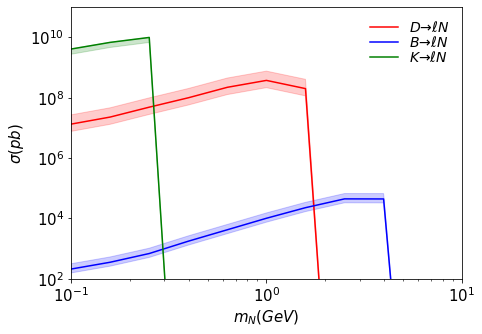

In [15]:
productions = [
    {"channels": [c[0] for c in production_channels if (("2body_4" in c[0]) or ("2body_-4" in c[0])) ], "color": "red"  , "label": r"$D \to \ell N$"  , "generators": ['NLO-P8','NLO-P8-Max', 'NLO-P8-Min']  },
    {"channels": [c[0] for c in production_channels if (("2body_5" in c[0]) or ("2body_-5" in c[0])) ], "color": "blue" , "label": r"$B \to \ell N$"  , "generators": ['NLO-P8','NLO-P8-Max', 'NLO-P8-Min']  },
    {"channels": [c[0] for c in production_channels if (("2body_3" in c[0]) or ("2body_-3" in c[0])) ], "color": "green", "label": r"$K \to \ell N$"  , "generators": ['EPOSLHC', 'SIBYLL', 'QGSJET'] },
    ]

_=foresee.plot_production(
    masses=masses, 
    productions = productions, 
    condition="True", 
    energy=energy,
    xlims=[0.1,10],
    ylims=[1e2,1e11],
    xlabel=r"$m_N (GeV)$", 
    ylabel=r"$\sigma (pb)$",
    figsize=(7,5), 
    fs_label=14, 
    title=None, 
    legendloc=None, 
    dolegend=True, 
    ncol=1,
)

Let us now scan over various masses and couplings, and record the resulting number of events. Here we are iterating over various detector configurations: FASER Run 3, FASER HL-LHC, and FASER2 HL-LHC. 

In [16]:
visible_modes = [mode for mode in list(model.br_finalstate.keys()) if mode != ('nu', 'nu', 'nu')]
couplings = np.logspace(-5,0,50+1)

detectors = [
    ["R3_FASER"  , 480, "np.sqrt(x.x**2 + x.y**2)< .1", 1.5, 250 ,  visible_modes],
    ["HL_FASER"  , 480, "np.sqrt(x.x**2 + x.y**2)< .1", 1.5, 3000,  visible_modes],
    ["HL_FASER2" , 650, "-1.5<x.x<1.5 and -.5<x.y<.5" , 10 , 3000,  visible_modes],
]

for detector in detectors: 
    
    #setup detector
    dlabel, distance, selection, length, luminosity, channels  = detector
    foresee.set_detector(distance=distance, selection=selection, length=length, luminosity=luminosity, channels=channels)
    
    #get reach 
    list_nevents = {label:[] for label in setupnames}
    for mass in masses:
        couplings, _, nevents, _, _  = foresee.get_events(mass=mass, energy=energy, couplings = couplings, nsample=2)
        for i,label in enumerate(setupnames): list_nevents[label].append(nevents.T[i])  

    #save results
    for label in setupnames: 
        result = np.array([masses,couplings,list_nevents[label]], dtype='object')
        np.save("model/results/"+energy+"TeV_"+dlabel+"_"+label+".npy",result)

We can now plot the results. For this, we first specify all detector setups for which we want to show result (filename in model/results directory, label, color, linestyle, opacity alpha for filled contours, required number of events).

In [17]:
setups = [ 
    [f"13.6TeV_R3_FASER_POWHEG-central.npy"  ,  r"FASER (Run 3)"      , "firebrick"  ,  "solid"   , 0., 3],
    [f"13.6TeV_HL_FASER_POWHEG-central.npy"  ,  r"FASER (HL-LHC)"     , "red"        ,  "solid"   , 0., 3],
    [f"13.6TeV_HL_FASER2_POWHEG-central.npy" ,  r"FASER2 (HL-LHC)"    , "salmon"     ,  "solid"   , 0., 3],
    [f"13.6TeV_R3_FASER_POWHEG-min.npy"      ,  ""                    , "firebrick"  ,  "dashed"  , 0., 3],
    [f"13.6TeV_HL_FASER_POWHEG-min.npy"      ,  ""                    , "red"        ,  "dashed"  , 0., 3],
    [f"13.6TeV_HL_FASER2_POWHEG-min.npy"     ,  ""                    , "salmon"     ,  "dashed"  , 0., 3],
    [f"13.6TeV_R3_FASER_POWHEG-max.npy"      ,  ""                    , "firebrick"  ,  "dotted"  , 0., 3],
    [f"13.6TeV_HL_FASER_POWHEG-max.npy"      ,  ""                    , "red"        ,  "dotted"  , 0., 3],
    [f"13.6TeV_HL_FASER2_POWHEG-max.npy"     ,  ""                    , "salmon"     ,  "dotted"  , 0., 3],
]

We also want to show the branching fractions for some of the channels (name of file in model/br directory, color, line style, label, x-position, y-position).

In [18]:
branchings = [
    [('nu', 'nu', 'nu')      , "black"         , "solid" , r"$\nu \nu \nu$"       , .17 , 0.06  ],
    [('nu', 'e', 'anti_e')   , "red"           , "solid" , r"$\nu e^+ e^-$"       , .17 , 0.02  ],
    [('nu', 'mu', 'anti_mu') , "orange"        , "solid" , r"$\nu \mu^+ \mu^-$"   , 6   , 5.5e-2],
    [('nu', 'pi0')           , "blue"          , "solid" , r"$\nu \pi^0$"         , .18 , 0.45  ],
    [('e', 'anti_mu', 'nu')  , "purple"        , "solid" , r"$\nu e^\pm \mu^\mp$" , 6   , 0.025 ],
    [('mu', 'anti_e', 'nu')  , "purple"        , "None"  , None                   , 5.0 , 0.025 ],
    [('mu', 'pi+')           , "green"         , "solid" , r"$\mu^\mp \pi^\pm $"  , .2  , 0.2   ],
    [('anti_mu', 'anti_pi+') , "green"         , "None"  , None                   , .2  , 0.13  ],
    [('mu', 'rho+')          , "brown"         , "solid" , r"$\mu^\mp \rho^\pm $" , 3.56, 2.5e-2],
    [('anti_mu', 'anti_rho+'), "brown"         , "None"  , None                   , .2  , 0.13  ],
    [('nu', 'rho0')          , "teal"          , "solid" , r"$\nu \rho^0 $"       , .95 , 2e-2  ],
    
]
branchingsother=['gray', 'solid', 'other', 1.2, 0.3, [0.1,10]]

Finally, we can plot everything using `foresee.plot_reach()`. The function `hnl.get_bounds()` is used to import existing constraints.  


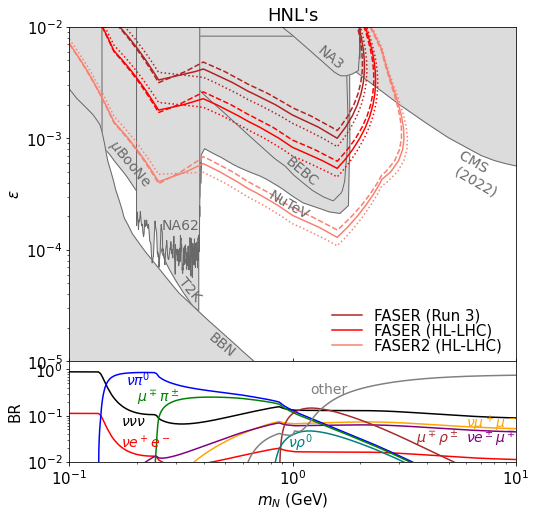

In [19]:
plot,ax, ax2 = foresee.plot_reach(
    setups=setups,
    bounds=hnl.get_bounds(),
    projections=[],
    branchings = branchings,
    title="HNL's",
    xlims = [0.1, 10], 
    ylims = [1e-5, 1e-2],
    xlabel=r"$m_{N}$ (GeV)", 
    ylabel=r"$\epsilon$",
    legendloc=(1,0.2),
    figsize=(8,8),
    branchingsother=branchingsother,
)

plot.savefig("Reach_"+modelname+".pdf")
plot.show()